## SF Crime Data Analysis and Modeling

### Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry).   
The second part is unsupervised learning for spatial data analysis (20 credits). 
The option part is the time series data analysis (50 credits).  
**Note**: you can download the small data (one month e.g. 2018-10) for debug, then download the data from 2013 to 2018 for testing and analysising.

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
# Download data from SF gov 
# import urllib.request
# urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
# dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
# display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))
## Download
# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD


path name size modificationTime dbfs:/laioffer/spark_hw1/data/sf_03_18.csv sf_03_18.csv 550945238 1652853058000

In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
# use this file name later

### Solove  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis or DS， 基础比较差的同学)

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

## helper function to transform the date, choose your way to do it. 

# refer: https://jaceklaskowski.gitbooks.io/mastering-spark-sql/spark-sql-functions-datetime.html
# 方法1 使用系统自带udf
# from pyspark.sql.functions import to_date, to_timestamp, hour
# df_opt1 = df_opt1.withColumn('Date', to_date(df_opt1.OccurredOn, "MM/dd/yy"))
# df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1.OccurredOn, "MM/dd/yy HH:mm"))
# df_opt1 = df_opt1.withColumn('Hour', hour(df_opt1['Time']))
# df_opt1 = df_opt1.withColumn("DayOfWeek", date_format(df_opt1.Date, "EEEE"))

## 方法2 手工写udf 
#from pyspark.sql.functions import col, udf
#from pyspark.sql.functions import expr
#from pyspark.sql.functions import from_unixtime

#date_func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
#month_func = udf (lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y/%m'), StringType())

#df = df_opt1.withColumn('month_year', month_func(col('Date')))\
#           .withColumn('Date_time', date_func(col('Date')))

## 方法3 手工在sql 里面
# select Date, substring(Date,7) as Year, substring(Date,1,2) as Month from sf_crime


## 方法4: 使用系统自带
# from pyspark.sql.functions import *
# df_update = df_opt1.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy")) ##change datetype from string to date
# df_update.createOrReplaceTempView("sf_crime")
# crimeYearMonth = spark.sql("SELECT Year(Date) AS Year, Month(Date) AS Month, FROM sf_crime")

PdId IncidntNum Incident Code Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y location SF Find Neighborhoods 2 2 Current Police Districts 2 2 Current Supervisor Districts 2 2 Analysis Neighborhoods 2 2 DELETE - Fire Prevention Districts 2 2 DELETE - Police Districts 2 2 DELETE - Supervisor Districts 2 2 DELETE - Zip Codes 2 2 DELETE - Neighborhoods 2 2 DELETE - 2017 Fix It Zones 2 2 Civic Center Harm Reduction Project Boundary 2 2 Fix It Zones as of 2017-11-06 2 2 DELETE - HSOC Zones 2 2 Fix It Zones as of 2018-02-07 2 2 CBD, BID and GBD Boundaries as of 2017 2 2 Areas of Vulnerability, 2016 2 2 Central Market/Tenderloin Boundary 2 2 Central Market/Tenderloin Boundary Polygon - Updated 2 2 HSOC Zones as of 2018-06-05 2 2 OWED Public Spaces 2 2 Neighborhoods 2 3114751606302 031147516 06302 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 5069701104134 050697011 04134 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 97 4 11 39 7 9 11 29490 41 null null null null null null 2 null null null null 97 6074729204104 060747292 04104 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 106 6 3 6 3 1 10 308 4 null null null null null null 2 null null null null 106 7103536315201 071035363 15201 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 49 10 8 41 1 8 4 59 40 null null null null null null 1 null null null null 49 11082415274000 110824152 74000 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) null null null null null null null 28588 null null null null null null null null null null null null null 4037801104134 040378011 04134 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) null null null null null null null 28856 null null null null null null null null null null null null null 4147669007025 041476690 07025 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 91 2 2 25 10 3 7 309 28 null null null null null null 1 null null null null 91 18030800164070 180308001 64070 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 86 2 9 1 10 3 8 58 1 null null null null null null 2 null null null null 86 18023216504170 180232165 04170 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 53 16028516271000 160285162 71000 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 38 3 5 5 15 4 5 28862 3 null null null 5 null 9 1 null null 5 null 38 17103493468020 171034934 68020 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 23 4 11 9 15 9 11 29492 10 null null null null null null 1 null null null null 23 17609651906372 176096519 06372 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of

####Q1 question (OLAP)
Write a Spark program that counts the number of crimes for different category.

In [0]:
%sql
SELECT COUNT(*) FROM sf_crime

count(1) 2129525

In [0]:
# Crime Count for Each Category
category_crime_count = spark.sql("SELECT Category, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(category_crime_count)

Category Count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

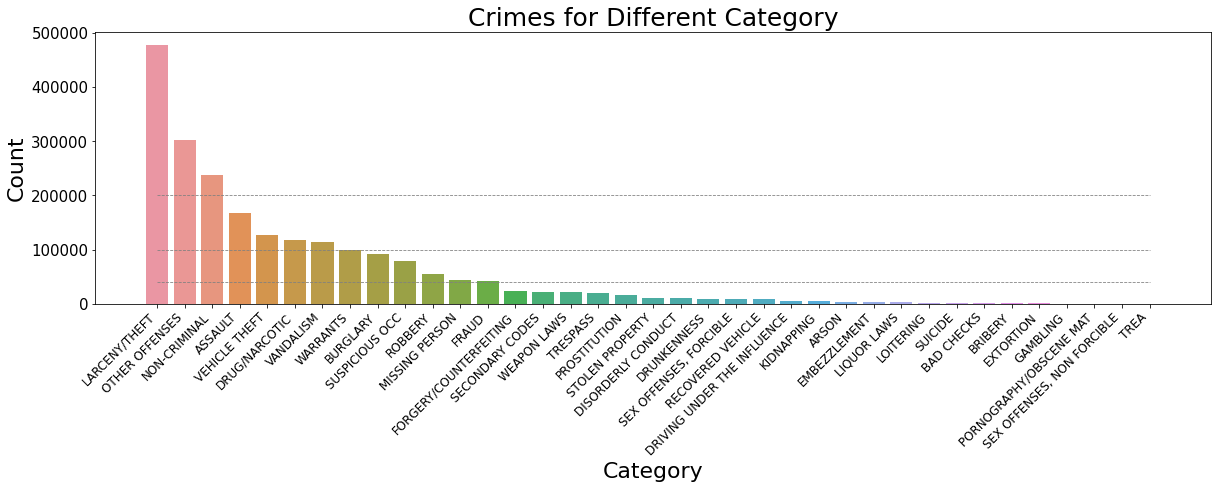

In [0]:
# Visualize Result 
# Export results to a pandas dataframe
fig, _ = plt.subplots(figsize=[20,5])
q1_pd_df = category_crime_count.toPandas()
q1_plot = sns.barplot(x='Category', y='Count', data=q1_pd_df)
q1_plot.set_xticklabels(q1_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.hlines(200000, 0, 36, colors='grey',linestyles='dashed', linewidth=0.8)
plt.hlines(100000, 0, 36, colors='grey',linestyles='dashed', linewidth=0.8)
plt.hlines(40000, 0, 36, colors='grey',linestyles='dashed', linewidth=0.8)
plt.title('Crimes for Different Category', fontsize=25)
plt.xlabel('Category', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=15)
plt.show()

##### Q1_Insight: 
###### There are 37 different crime categories in SF. They can be roughly classified into 4 categories based on the counts:
1) Extremely high crime rate (>200000): 3 types
2) High crime rate (>100000 and <200000): 4 types
3) Medium crime rate (>40000 and < 100000): 6 types
4) Low crime rate (<40000): 24 types

#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [0]:
# District Number
district_num = spark.sql("SELECT COUNT(DISTINCT PdDistrict) AS District_number FROM sf_crime")
display(district_num)

District_number 11

In [0]:
# Crime Count/Each District
district_crime_count = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(district_crime_count)

PdDistrict Count SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

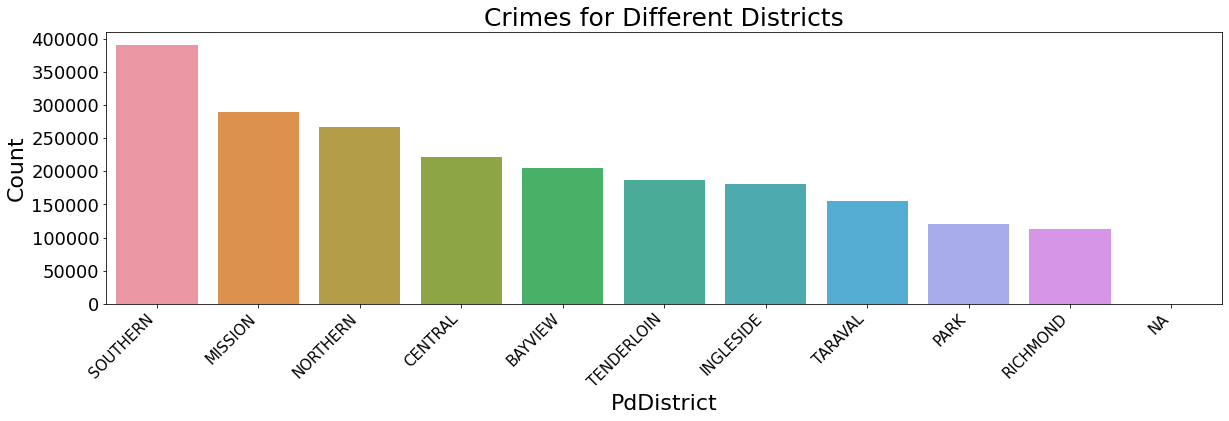

In [0]:
# Visualize Result 
# Export results to a pandas dataframe
_ = plt.subplots(figsize=[20,5])
q2_pd_df = district_crime_count.toPandas()
q2_plot = sns.barplot(x='PdDistrict', y='Count', data=q2_pd_df)
q2_plot.set_xticklabels(q2_plot.get_xticklabels(), horizontalalignment='right')
plt.title("Crimes for Different Districts", fontsize=25)
plt.xlabel('PdDistrict', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=18)
plt.show()

##### Q2_Insight: 
###### There are 10 identified districts in SF that were recorded with crimes, as well as 1 district occuring 1 crime that has no district name. 
1) Southern district ranked first and is the most dangerous place
2) Richmond had the lowest crime counts which is the safest

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown".   
hint 1: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

hint 2: SF downtown 物理范围可以是 rectangle a < x < b  and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740). 也可以是中心一个圈，距离小于多少算做downtown

In [0]:
# Create a new spark df
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location 031147516 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) 050697011 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 060747292 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 071035363 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 110824152 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) 040378011 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) 041476690 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 180308001 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 180232165 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 160285162 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 171034934 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 176096519 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of LOMBARD ST -122.43362219642138 37.800270294430966 POINT (-122.43362219642138 37.800270294430966) 170673353 NON-CRIMINAL LOST PROPERTY Wednesday 07/19/2017 12:00 MISSION NONE MISSION ST / 16TH ST -122.41967178029562 37.76505012146682 POINT (-122.41967178029562 37.76505012146682) 170060590 OTHER OFFENSES RESISTING ARREST Sunday 01/22/2017 17:57 RICHMOND ARREST, BOOKED CLEMENT ST / 17TH AV -122.47630696110282 37.782403326398246 POINT (-122.47630696110282 37.782403326398246) 170836238 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Friday 10/13/2017 06:45 TENDERLOIN NONE 600 Block of ELLIS ST -122.41689371073893 37.784286048038915 POINT (-122.41689371073893 37.784286048038915) 180298866 LARCENY/THEFT PETTY THEFT FROM LOCKED AUTO Sunday 04/22/2018 18:00 NORTHERN NONE 600 Block of VANNESS AV -122.4206913866642 37.781483252353745 POINT (-122.4206913866642 37.781483252353745) 166192876 LARCENY/THEFT PETTY THEFT BICYCLE Tuesday 08/09/2016 19:00 SOUTHERN NONE MARKET ST / 2ND ST -122.40137806754392 37.78926393104578 POINT (-122.40137806754392 37.78926393104578) 166249687 LARCENY/THEFT PETTY THEFT OF PROPERTY Sunday 08/21/2016 10:00 NORTHERN NONE 800 Block of LARKIN ST -122.41788544104195 37.785437847196754 POINT (-122.41788544104195 37.785437847196754) 180299375 ASSAULT THREATS AGAINST LIFE Sunday 04/22/2018 22:25 NORTHERN ARREST, BOOKED 1300 Block of FILLMORE ST -122.43235564136246 37.78190654767414 POINT (-122.43235564136246 37.78190654767414) 180216589 ASSAULT BATTERY Friday 03/23/2018 00:55 INGLESIDE ARREST, BOOKED SAN JOSE AV / 29TH ST -122.42267219236795 37.74394327043075 POINT (-122.42267219236795 37.74394327043075) 160162980 LARCENY/THEFT PETTY THEFT SHOPLIFTING Wednesday 02/24/2016 12:36 SOUTHERN ARREST, BOOKED 800 Block of MARKET ST -122.4065209871443 37.785062942166064 POINT (-122.4065209871443 37.785062942166064) 170747629 VANDALISM MALICIOUS MISCHIEF

In [0]:
# Date (string) needs to be converted to date format
from pyspark.sql.functions import hour, date_format, to_date, month, year

df_new = df_opt2.withColumn("IncidentDate", to_date(df_opt2.Date, "MM/dd/yyyy"))
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
df_new.createOrReplaceTempView("sf_crime")
display(df_new)

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location IncidentDate Month Year 031147516 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) 2003-09-28 9 2003 050697011 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 2005-06-22 6 2005 060747292 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 2006-07-15 7 2006 071035363 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 2007-09-25 9 2007 110824152 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) 2011-09-24 9 2011 040378011 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) 2003-12-12 12 2003 041476690 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 2004-12-30 12 2004 180308001 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 2018-04-25 4 2018 180232165 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 2018-03-24 3 2018 160285162 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 2016-03-01 3 2016 171034934 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 2017-12-22 12 2017 176096519 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of LOMBARD ST -122.43362219642138 37.800270294430966 POINT (-122.43362219642138 37.800270294430966) 2017-04-15 4 2017 170673353 NON-CRIMINAL LOST PROPERTY Wednesday 07/19/2017 12:00 MISSION NONE MISSION ST / 16TH ST -122.41967178029562 37.76505012146682 POINT (-122.41967178029562 37.76505012146682) 2017-07-19 7 2017 170060590 OTHER OFFENSES RESISTING ARREST Sunday 01/22/2017 17:57 RICHMOND ARREST, BOOKED CLEMENT ST / 17TH AV -122.47630696110282 37.782403326398246 POINT (-122.47630696110282 37.782403326398246) 2017-01-22 1 2017 170836238 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Friday 10/13/2017 06:45 TENDERLOIN NONE 600 Block of ELLIS ST -122.41689371073893 37.784286048038915 POINT (-122.41689371073893 37.784286048038915) 2017-10-13 10 2017 180298866 LARCENY/THEFT PETTY THEFT FROM LOCKED AUTO Sunday 04/22/2018 18:00 NORTHERN NONE 600 Block of VANNESS AV -122.4206913866642 37.781483252353745 POINT (-122.4206913866642 37.781483252353745) 2018-04-22 4 2018 166192876 LARCENY/THEFT PETTY THEFT BICYCLE Tuesday 08/09/2016 19:00 SOUTHERN NONE MARKET ST / 2ND ST -122.40137806754392 37.78926393104578 POINT (-122.40137806754392 37.78926393104578) 2016-08-09 8 2016 166249687 LARCENY/THEFT PETTY THEFT OF PROPERTY Sunday 08/21/2016 10:00 NORTHERN NONE 800 Block of LARKIN ST -122.41788544104195 37.785437847196754 POINT (-122.41788544104195 37.785437847196754) 2016-08-21 8 2016 180299375 ASSAULT THREATS AGAINST LIFE Sunday 04/22/2018 22:25 NORTHERN ARREST, BOOKED 1300 Block of FILLMORE ST -122.43235564136246 37.78190654767414 POINT (-122.43235564136246 37.78190654767414) 2018-04-22 4 2018 180216589 ASSAULT BATTERY Friday 03/23/2018 00:55 INGLE

In [0]:
SFdt_Sunday_crime = spark.sql("SELECT IncidentDate AS Sunday_Date, COUNT(*) AS Count FROM sf_crime WHERE X<-122.4213 AND X>-122.4313 AND Y>37.7540 AND Y<37.7740 AND DayofWeek = 'Sunday' GROUP BY 1 ORDER BY 1")
display(SFdt_Sunday_crime)

Sunday_Date Count 2003-01-05 13 2003-01-12 20 2003-01-19 17 2003-01-26 13 2003-02-02 14 2003-02-09 22 2003-02-16 12 2003-02-23 14 2003-03-02 16 2003-03-09 8 2003-03-16 18 2003-03-23 9 2003-03-30 20 2003-04-06 8 2003-04-13 13 2003-04-20 13 2003-04-27 5 2003-05-04 9 2003-05-11 5 2003-05-18 16 2003-05-25 10 2003-06-01 11 2003-06-08 25 2003-06-15 6 2003-06-22 6 2003-06-29 16 2003-07-06 10 2003-07-13 17 2003-07-20 17 2003-07-27 8 2003-08-03 6 2003-08-10 5 2003-08-17 11 2003-08-24 10 2003-08-31 8 2003-09-07 13 2003-09-14 10 2003-09-21 10 2003-09-28 7 2003-10-05 14 2003-10-12 13 2003-10-19 11 2003-10-26 16 2003-11-02 17 2003-11-09 16 2003-11-16 10 2003-11-23 14 2003-11-30 6 2003-12-07 4 2003-12-14 10 2003-12-21 12 2003-12-28 11 2004-01-04 14 2004-01-11 15 2004-01-18 6 2004-01-25 22 2004-02-01 16 2004-02-08 20 2004-02-15 11 2004-02-22 18 2004-02-29 11 2004-03-07 16 2004-03-14 8 2004-03-21 8 2004-03-28 12 2004-04-04 13 2004-04-11 15 2004-04-18 10 2004-04-25 11 2004-05-02 12 2004-05-09 16 2004-05-16 22 2004-05-23 5 2004-05-30 15 2004-06-06 16 2004-06-13 10 2004-06-20 10 2004-06-27 11 2004-07-04 10 2004-07-11 11 2004-07-18 18 2004-07-25 11 2004-08-01 16 2004-08-08 13 2004-08-15 8 2004-08-22 12 2004-08-29 22 2004-09-05 15 2004-09-12 9 2004-09-19 21 2004-09-26 14 2004-10-03 13 2004-10-10 18 2004-10-17 15 2004-10-24 19 2004-10-31 31 2004-11-07 14 2004-11-14 18 2004-11-21 10 2004-11-28 8 2004-12-05 9 2004-12-12 10 2004-12-19 12 2004-12-26 7 2005-01-02 8 2005-01-09 16 2005-01-16 8 2005-01-23 10 2005-01-30 10 2005-02-06 10 2005-02-13 7 2005-02-20 14 2005-02-27 10 2005-03-06 14 2005-03-13 13 2005-03-20 8 2005-03-27 6 2005-04-03 18 2005-04-10 16 2005-04-17 4 2005-04-24 11 2005-05-01 11 2005-05-08 12 2005-05-15 7 2005-05-22 6 2005-05-29 10 2005-06-05 9 2005-06-12 10 2005-06-19 12 2005-06-26 18 2005-07-03 12 2005-07-10 14 2005-07-17 9 2005-07-24 13 2005-07-31 10 2005-08-07 10 2005-08-14 3 2005-08-21 11 2005-08-28 13 2005-09-04 9 2005-09-11 8 2005-09-18 5 2005-09-25 19 2005-10-02 16 2005-10-09 25 2005-10-16 7 2005-10-23 9 2005-10-30 9 2005-11-06 8 2005-11-13 11 2005-11-20 16 2005-11-27 13 2005-12-04 16 2005-12-11 6 2005-12-18 7 2005-12-25 15 2006-01-01 20 2006-01-08 14 2006-01-15 4 2006-01-22 11 2006-01-29 13 2006-02-05 11 2006-02-12 11 2006-02-19 20 2006-02-26 9 2006-03-05 7 2006-03-12 6 2006-03-19 13 2006-03-26 10 2006-04-02 16 2006-04-09 14 2006-04-16 7 2006-04-23 12 2006-04-30 12 2006-05-07 7 2006-05-14 14 2006-05-21 18 2006-05-28 13 2006-06-04 9 2006-06-11 9 2006-06-18 10 2006-06-25 18 2006-07-02 20 2006-07-09 12 2006-07-16 22 2006-07-23 15 2006-07-30 26 2006-08-06 6 2006-08-13 21 2006-08-20 16 2006-08-27 16 2006-09-03 8 2006-09-10 12 2006-09-17 7 2006-09-24 6 2006-10-01 19 2006-10-08 10 2006-10-15 8 2006-10-22 12 2006-10-29 9 2006-11-05 14 2006-11-12 16 2006-11-19 12 2006-11-26 9 2006-12-03 21 2006-12-10 14 2006-12-17 9 2006-12-24 5 2006-12-31 11 2007-01-07 19 2007-01-14 6 2007-01-21 7 2007-01-28 12 2007-02-04 6 2007-02-11 13 2007-02-18 16 2007-02-25 8 2007-03-04 6 2007-03-11 15 2007-03-18 5 2007-03-25 17 2007-04-01 18 2007-04-08 13 2007-04-15 13 2007-04-22 12 2007-04-29 18 2007-05-06 3 2007-05-13 5 2007-05-20 11 2007-05-27 12 2007-06-03 7 2007-06-10 12 2007-06-17 18 2007-06-24 28 2007-07-01 15 2007-07-08 12 2007-07-15 9 2007-07-22 8 2007-07-29 8 2007-08-05 8 2007-08-12 18 2007-08-19 8 2007-08-26 14 2007-09-02 9 2007-09-09 23 2007-09-16 16 2007-09-23 1 2007-09-30 7 2007-10-07 14 2007-10-14 11 2007-10-21 8 2007-10-28 18 2007-11-04 12 2007-11-11 14 2007-11-18 16 2007-11-25 11 2007-12-02 8 2007-12-09 11 2007-12-23 5 2007-12-30 12 2008-01-06 7 2008-01-13 10 2008-01-20 19 2008-01-27 6 2008-02-03 12 2008-02-10 9 2008-02-17 7 2008-02-24 8 2008-03-02 8 2008-03-09 10 2008-03-16 14 2008-03-23 16 2008-03-30 7 2008-04-06 8 2008-04-13 11 2008-04-20 14 2008-04-27 8 2008-05-04 19 2008-05-11 9 2008-05-18 10 2008-05-25 10 2008-06-01 23 2008-06-08 13 2008-06-15 20 2008-06-22 5 2008-06-29 13 2008-07-06 9 2008-07-13 14 2008-07-20 7 2008-07-27 2 2008-08-03 9 2008

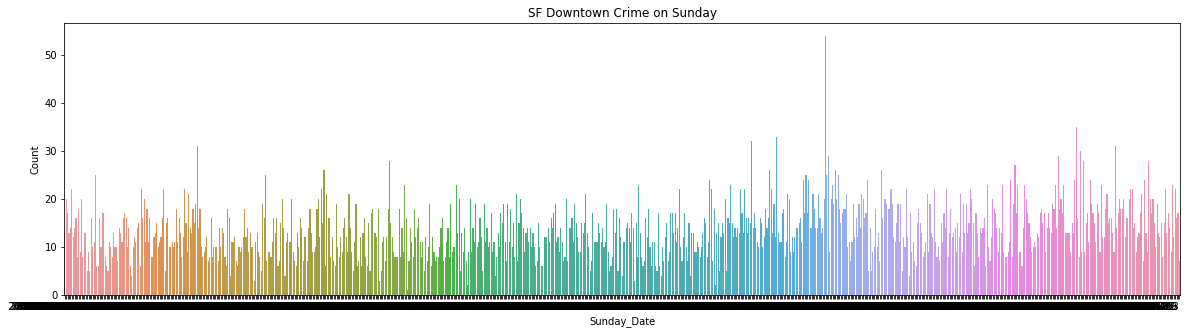

In [0]:
# Visualize Result 
# Export results to a pandas dataframe

_ = plt.subplots(figsize=[20,5])
q3_pd_df = SFdt_Sunday_crime.toPandas()
q3_plot = sns.barplot(x='Sunday_Date', y='Count', data=q3_pd_df)
q3_plot.set_xticklabels(q3_plot.get_xticklabels(), horizontalalignment='right')
plt.title("SF Downtown Crime on Sunday")
plt.show()

#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
year_month_count = spark.sql("SELECT Year, Month, COUNT(*) AS Count FROM sf_crime WHERE Year IN (2015,2016,2017,2018) GROUP BY 1,2 ORDER BY 1,2")
display(year_month_count)

Year Month Count 2015 1 13181 2015 2 11882 2015 3 13463 2015 4 12526 2015 5 13318 2015 6 12853 2015 7 12949 2015 8 13317 2015 9 12476 2015 10 12697 2015 11 11691 2015 12 11106 2016 1 12532 2016 2 11743 2016 3 11950 2016 4 11905 2016 5 12313 2016 6 11727 2016 7 11832 2016 8 12104 2016 9 12092 2016 10 12913 2016 11 12254 2016 12 12629 2017 1 12687 2017 2 11780 2017 3 13250 2017 4 12452 2017 5 12758 2017 6 12186 2017 7 12717 2017 8 12428 2017 9 12204 2017 10 12970 2017 11 11940 2017 12 12115 2018 1 11667 2018 2 9565 2018 3 10354 2018 4 9954 2018 5 3519

Out[80]: (array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

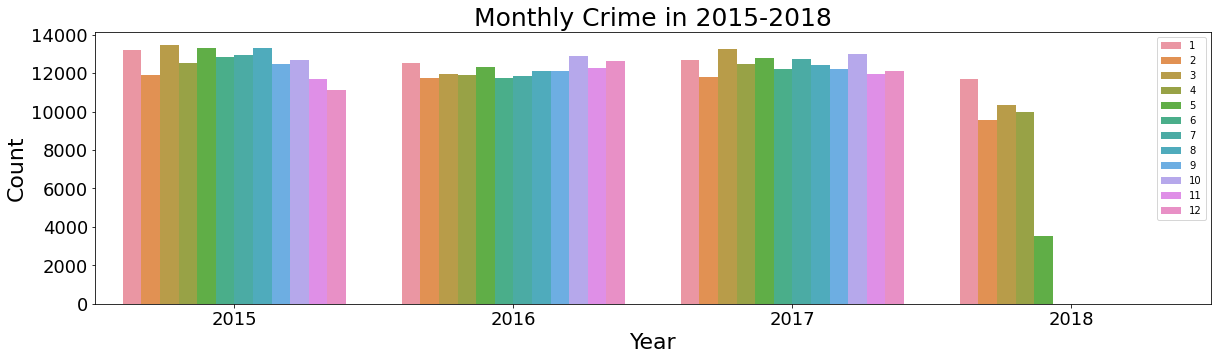

In [0]:
_ = plt.subplots(figsize=[20,5])
q4_pd_df = year_month_count.toPandas()
sns.barplot(x='Year', hue='Month', y='Count', data=q4_pd_df)
plt.legend(loc='upper right')
plt.title('Monthly Crime in 2015-2018', fontsize=25)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

##### Q4_Insight: 
1. Crime rates are very high from 2015 to 2017. This may be caused by the 47th Act signed by the governor in the California referendum in 2014.
2. Crime rate drops evidently in 2018, especially after May. Through online research, the reason for the decline could be the enhanced uniformed police patrols. Also, the SF Police took action on inhibiting the drug trade which may also contribute to the reduced crime rate.

#### Q5 question (OLAP)
Analysis the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
# add new columns to convert Time to hour format
from pyspark.sql.functions import to_timestamp

df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'], 'HH:mm'))
df_new1 = df_new1.withColumn('Hour', hour(df_new1['IncidentTime']))
df_new1.createOrReplaceTempView("sf_crime")
display(df_new1)

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location IncidentDate Month Year IncidentTime Hour 031147516 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) 2003-09-28 9 2003 1970-01-01T10:00:00.000+0000 10 050697011 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 2005-06-22 6 2005 1970-01-01T12:20:00.000+0000 12 060747292 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 2006-07-15 7 2006 1970-01-01T00:55:00.000+0000 0 071035363 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 2007-09-25 9 2007 1970-01-01T00:01:00.000+0000 0 110824152 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) 2011-09-24 9 2011 1970-01-01T11:00:00.000+0000 11 040378011 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) 2003-12-12 12 2003 1970-01-01T12:00:00.000+0000 12 041476690 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 2004-12-30 12 2004 1970-01-01T19:00:00.000+0000 19 180308001 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 2018-04-25 4 2018 1970-01-01T05:00:00.000+0000 5 180232165 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 2018-03-24 3 2018 1970-01-01T07:00:00.000+0000 7 160285162 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 2016-03-01 3 2016 1970-01-01T00:01:00.000+0000 0 171034934 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 2017-12-22 12 2017 1970-01-01T23:30:00.000+0000 23 176096519 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of LOMBARD ST -122.43362219642138 37.800270294430966 POINT (-122.43362219642138 37.800270294430966) 2017-04-15 4 2017 1970-01-01T00:45:00.000+0000 0 170673353 NON-CRIMINAL LOST PROPERTY Wednesday 07/19/2017 12:00 MISSION NONE MISSION ST / 16TH ST -122.41967178029562 37.76505012146682 POINT (-122.41967178029562 37.76505012146682) 2017-07-19 7 2017 1970-01-01T12:00:00.000+0000 12 170060590 OTHER OFFENSES RESISTING ARREST Sunday 01/22/2017 17:57 RICHMOND ARREST, BOOKED CLEMENT ST / 17TH AV -122.47630696110282 37.782403326398246 POINT (-122.47630696110282 37.782403326398246) 2017-01-22 1 2017 1970-01-01T17:57:00.000+0000 17 170836238 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Friday 10/13/2017 06:45 TENDERLOIN NONE 600 Block of ELLIS ST -122.41689371073893 37.784286048038915 POINT (-122.41689371073893 37.784286048038915) 2017-10-13 10 2017 1970-01-01T06:45:00.000+0000 6 180298866 LARCENY/THEFT PETTY THEFT FROM LOCKED AUTO Sunday 04/22/2018 18:00 NORTHERN NONE 600 Block of VANNESS AV -122.4206913866642 37.781483252353745 POINT (-122.4206913866642 37.781483252353745) 2018-04-22 4 2018 1970-01-01T18:00:00.000+0000 18 166192876 LARCENY/THEFT PETTY THEFT BICYCLE Tuesday 08/09/2016 19:00 SOUTHERN NONE MARKET ST / 2ND ST -122.40137806754392 37.78926393104578 POINT (-122.401378067543

In [0]:
hourly_crime = spark.sql("SELECT IncidentDate, Hour, COUNT(*) AS Count FROM sf_crime WHERE IncidentDate IN ('2015-12-15','2016-12-15','2017-12-15') GROUP BY 1,2 ORDER BY 1,2")
display(hourly_crime)

IncidentDate Hour Count 2015-12-15 0 15 2015-12-15 1 6 2015-12-15 2 5 2015-12-15 3 4 2015-12-15 4 10 2015-12-15 5 3 2015-12-15 6 4 2015-12-15 7 8 2015-12-15 8 12 2015-12-15 9 10 2015-12-15 10 25 2015-12-15 11 15 2015-12-15 12 35 2015-12-15 13 13 2015-12-15 14 27 2015-12-15 15 14 2015-12-15 16 30 2015-12-15 17 18 2015-12-15 18 17 2015-12-15 19 26 2015-12-15 20 13 2015-12-15 21 13 2015-12-15 22 13 2015-12-15 23 10 2016-12-15 0 21 2016-12-15 1 9 2016-12-15 2 12 2016-12-15 3 9 2016-12-15 4 1 2016-12-15 5 6 2016-12-15 6 3 2016-12-15 7 3 2016-12-15 8 21 2016-12-15 9 23 2016-12-15 10 12 2016-12-15 11 17 2016-12-15 12 29 2016-12-15 13 17 2016-12-15 14 19 2016-12-15 15 13 2016-12-15 16 17 2016-12-15 17 19 2016-12-15 18 38 2016-12-15 19 30 2016-12-15 20 25 2016-12-15 21 15 2016-12-15 22 22 2016-12-15 23 15 2017-12-15 0 30 2017-12-15 1 12 2017-12-15 2 6 2017-12-15 3 4 2017-12-15 4 9 2017-12-15 5 2 2017-12-15 6 6 2017-12-15 7 11 2017-12-15 8 26 2017-12-15 9 14 2017-12-15 10 27 2017-12-15 11 26 2017-12-15 12 23 2017-12-15 13 10 2017-12-15 14 11 2017-12-15 15 26 2017-12-15 16 30 2017-12-15 17 27 2017-12-15 18 28 2017-12-15 19 29 2017-12-15 20 17 2017-12-15 21 20 2017-12-15 22 36 2017-12-15 23 28

Out[79]: (array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

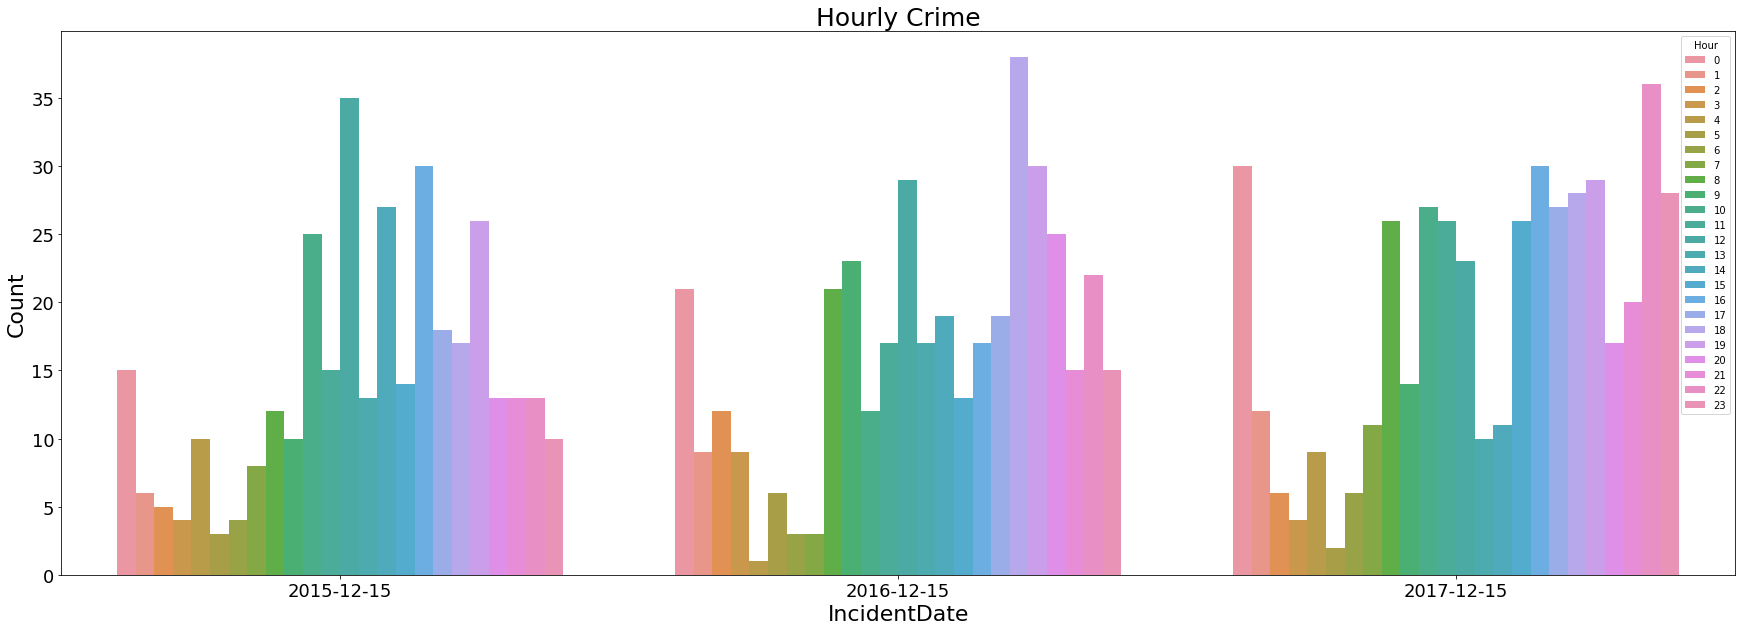

In [0]:
# Visualize Result 
_ = plt.subplots(figsize=[30,10])
q5_pd_df = hourly_crime.toPandas()
sns.barplot(x='IncidentDate', hue='Hour', y='Count', data=q5_pd_df)
plt.title('Hourly Crime', fontsize=25)
plt.xlabel('IncidentDate', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

##### Q5_Insight:
There are two peak periods of crime, i.e. 12 o'clock and 18 o'clock. This time period is the time for tourists to eat and rest. Please stay alert while you are eating or walking on the street.

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

###### Step1: Find the top-3 dangerous districts

In [0]:
top_3 = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC LIMIT 3")
display(top_3)

PdDistrict Count SOUTHERN 390692 MISSION 288985 NORTHERN 266435

###### Step2: Find out the crime event w.r.t category and time (hour) from the result of step 1

In [0]:
crime_category_hour = spark.sql("SELECT Hour, Category, COUNT(*) AS Count FROM sf_crime WHERE PdDistrict IN ('SOUTHERN', 'MISSION', 'NORTHERN') GROUP BY 1,2 ORDER BY 1")
display(crime_category_hour)

Hour Category Count 0 LIQUOR LAWS 63 0 RECOVERED VEHICLE 138 0 SECONDARY CODES 519 0 BRIBERY 20 0 DISORDERLY CONDUCT 301 0 SUICIDE 12 0 VEHICLE THEFT 1568 0 WEAPON LAWS 466 0 EXTORTION 29 0 FORGERY/COUNTERFEITING 1644 0 BURGLARY 1585 0 BAD CHECKS 79 0 EMBEZZLEMENT 280 0 ROBBERY 1400 0 LOITERING 48 0 SEX OFFENSES, NON FORCIBLE 4 0 PORNOGRAPHY/OBSCENE MAT 1 0 LARCENY/THEFT 10082 0 ARSON 84 0 GAMBLING 13 0 SEX OFFENSES, FORCIBLE 450 0 DRIVING UNDER THE INFLUENCE 272 0 TRESPASS 260 0 DRUNKENNESS 400 0 NON-CRIMINAL 5203 0 MISSING PERSON 784 0 STOLEN PROPERTY 297 0 FRAUD 2489 0 ASSAULT 4120 0 KIDNAPPING 116 0 VANDALISM 2654 0 SUSPICIOUS OCC 2148 0 OTHER OFFENSES 7632 0 DRUG/NARCOTIC 1756 0 PROSTITUTION 1107 0 WARRANTS 1933 1 SEX OFFENSES, FORCIBLE 252 1 FORGERY/COUNTERFEITING 92 1 TRESPASS 180 1 OTHER OFFENSES 3902 1 ASSAULT 3940 1 SUICIDE 13 1 STOLEN PROPERTY 219 1 WARRANTS 1413 1 FRAUD 414 1 DRUNKENNESS 369 1 WEAPON LAWS 354 1 PROSTITUTION 819 1 LOITERING 38 1 EXTORTION 4 1 NON-CRIMINAL 2948 1 EMBEZZLEMENT 4 1 BAD CHECKS 3 1 GAMBLING 1 1 SECONDARY CODES 318 1 MISSING PERSON 355 1 RECOVERED VEHICLE 103 1 BRIBERY 11 1 BURGLARY 1064 1 ARSON 77 1 LARCENY/THEFT 6644 1 DISORDERLY CONDUCT 225 1 VANDALISM 1916 1 SUSPICIOUS OCC 996 1 DRIVING UNDER THE INFLUENCE 274 1 VEHICLE THEFT 1129 1 LIQUOR LAWS 28 1 KIDNAPPING 111 1 ROBBERY 1534 1 DRUG/NARCOTIC 1156 2 LIQUOR LAWS 23 2 DISORDERLY CONDUCT 212 2 NON-CRIMINAL 2335 2 BURGLARY 1152 2 PROSTITUTION 630 2 LARCENY/THEFT 4065 2 WEAPON LAWS 323 2 WARRANTS 1212 2 STOLEN PROPERTY 165 2 ARSON 84 2 ROBBERY 1749 2 SUSPICIOUS OCC 871 2 DRUNKENNESS 294 2 DRUG/NARCOTIC 947 2 FORGERY/COUNTERFEITING 64 2 VANDALISM 1780 2 DRIVING UNDER THE INFLUENCE 263 2 SUICIDE 13 2 KIDNAPPING 106 2 SECONDARY CODES 293 2 BRIBERY 12 2 OTHER OFFENSES 3279 2 SEX OFFENSES, FORCIBLE 261 2 VEHICLE THEFT 889 2 MISSING PERSON 271 2 FRAUD 283 2 TRESPASS 241 2 RECOVERED VEHICLE 77 2 EMBEZZLEMENT 4 2 LOITERING 24 2 EXTORTION 3 2 BAD CHECKS 2 2 ASSAULT 3510 3 DRIVING UNDER THE INFLUENCE 117 3 SEX OFFENSES, FORCIBLE 188 3 FORGERY/COUNTERFEITING 61 3 SUICIDE 9 3 WARRANTS 950 3 SUSPICIOUS OCC 626 3 VANDALISM 1223 3 PROSTITUTION 422 3 VEHICLE THEFT 552 3 WEAPON LAWS 199 3 NON-CRIMINAL 1443 3 OTHER OFFENSES 2329 3 STOLEN PROPERTY 143 3 ARSON 95 3 LARCENY/THEFT 2419 3 ASSAULT 1622 3 LIQUOR LAWS 12 3 SECONDARY CODES 197 3 RECOVERED VEHICLE 84 3 DRUG/NARCOTIC 607 3 DISORDERLY CONDUCT 140 3 DRUNKENNESS 128 3 EMBEZZLEMENT 6 3 LOITERING 27 3 BRIBERY 6 3 EXTORTION 2 3 TRESPASS 174 3 GAMBLING 1 3 PORNOGRAPHY/OBSCENE MAT 1 3 BURGLARY 1229 3 MISSING PERSON 162 3 KIDNAPPING 68 3 ROBBERY 988 3 FRAUD 160 4 ASSAULT 1017 4 FORGERY/COUNTERFEITING 35 4 STOLEN PROPERTY 115 4 OTHER OFFENSES 1744 4 DRUNKENNESS 55 4 SUSPICIOUS OCC 413 4 ARSON 74 4 DRIVING UNDER THE INFLUENCE 40 4 NON-CRIMINAL 1065 4 TRESPASS 138 4 DRUG/NARCOTIC 444 4 VANDALISM 798 4 LARCENY/THEFT 1542 4 WARRANTS 674 4 SUICIDE 4 4 ROBBERY 643 4 MISSING PERSON 107 4 KIDNAPPING 37 4 FRAUD 103 4 SECONDARY CODES 127 4 LIQUOR LAWS 7 4 BRIBERY 5 4 WEAPON LAWS 142 4 BURGLARY 1032 4 RECOVERED VEHICLE 59 4 LOITERING 14 4 EMBEZZLEMENT 4 4 EXTORTION 2 4 BAD CHECKS 2 4 PROSTITUTION 328 4 VEHICLE THEFT 440 4 DISORDERLY CONDUCT 100 4 SEX OFFENSES, FORCIBLE 101 5 SUSPICIOUS OCC 297 5 VANDALISM 697 5 BURGLARY 948 5 TRESPASS 213 5 LARCENY/THEFT 1490 5 FORGERY/COUNTERFEITING 25 5 VEHICLE THEFT 392 5 STOLEN PROPERTY 94 5 EXTORTION 4 5 DISORDERLY CONDUCT 163 5 ARSON 60 5 WEAPON LAWS 74 5 ASSAULT 772 5 BRIBERY 2 5 SUICIDE 9 5 NON-CRIMINAL 1018 5 MISSING PERSON 149 5 RECOVERED VEHICLE 43 5 KIDNAPPING 34 5 FRAUD 85 5 DRUG/NARCOTIC 216 5 SEX OFFENSES, FORCIBLE 62 5 DRUNKENNESS 20 5 ROBBERY 486 5 SECONDARY CODES 109 5 OTHER OFFENSES 1214 5 PROSTITUTION 429 5 LOITERING 28 5 WARRANTS 459 5 BAD CHECKS 1 5 TREA 1 5 DRIVING UNDER THE INFLUENCE 27 5 GAMBLING 1 5 EMBEZZLEMENT 4 5 LIQUOR LAWS 1 6 SUICIDE 13 6 LIQUOR LAWS 17 6 SEX OFFENSES, FORCIBLE 69 6 VANDALISM 782 6 BURGLARY 858 6 MISSING PERSON 239 6 STOLEN PROPERTY 96 6 

Out[63]: <matplotlib.legend.Legend at 0x7f256e6e7160>

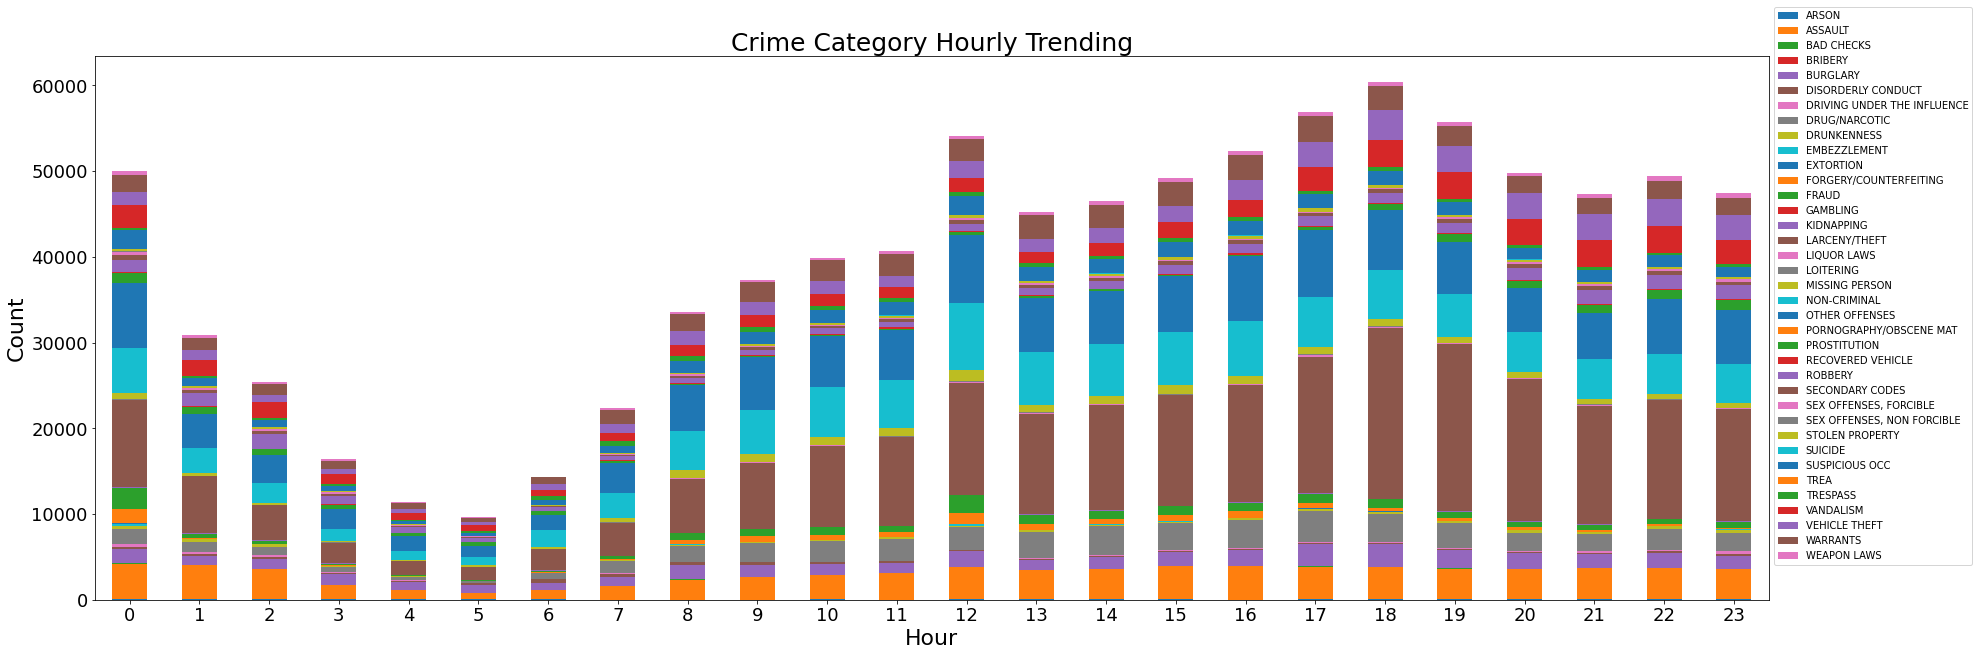

In [0]:
# Visualize Result
q6_pd_df = crime_category_hour.toPandas()
q6_pd_df = q6_pd_df.pivot(index='Hour', columns='Category', values='Count')
q6_pd_df.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xlabel('Hour', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Crime Category Hourly Trending', fontsize=25)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.01, 0.1))

###### Step3: Advice
1. The most dangerous districts: SOUTHERN, MISSION, NORTHERN
2. The lowest crime rate occurred around 5 am, while the highest crime rates happened around 12 pm and 18 pm.
   Police should pay extra attention to LACENY/THEFT by increasing police patrol during those time

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
%sql
SELECT DISTINCT(resolution) AS Resolution FROM sf_crime

Resolution EXCEPTIONAL CLEARANCE ARREST, BOOKED PROSECUTED FOR LESSER OFFENSE LOCATED UNFOUNDED DISTRICT ATTORNEY REFUSES TO PROSECUTE PSYCHOPATHIC CASE COMPLAINANT REFUSES TO PROSECUTE ARREST, CITED PROSECUTED BY OUTSIDE AGENCY NONE NOT PROSECUTED

In [0]:
%sql WITH cte1 AS(
  SELECT
    Category,
    COUNT(*) AS Count
  FROM
    sf_crime
  GROUP BY
    1
),
cte2 AS(
  SELECT
    Category,
    COUNT(
      CASE
        WHEN Resolution NOT IN ('NONE') THEN Resolution
      END
    ) AS Resolved
  FROM
    sf_crime
  GROUP BY
    1
)
SELECT
  cte1.Category,
  cte1.Count,
  cte2.Resolved,
  (cte2.Resolved / ROUND(cte1.Count, 2)) * 100 AS Percentage
FROM
  cte1
  JOIN cte2 ON cte1.Category = cte2.Category
ORDER BY 4 DESC

Category Count Resolved Percentage PROSTITUTION 16501 15651 94.84879704260348 WARRANTS 99821 94339 94.50816962362629 DRIVING UNDER THE INFLUENCE 5652 5335 94.39136588818118 DRUG/NARCOTIC 117821 107565 91.2952699433887 LIQUOR LAWS 2840 2527 88.97887323943662 LOITERING 2402 2103 87.55203996669442 STOLEN PROPERTY 11450 10011 87.43231441048034 DRUNKENNESS 9760 8035 82.32581967213115 OTHER OFFENSES 301874 215059 71.24131260062146 WEAPON LAWS 21004 14934 71.1007427156732 TRESPASS 19194 12907 67.24497238720434 GAMBLING 343 229 66.76384839650146 DISORDERLY CONDUCT 9932 6474 65.18324607329843 KIDNAPPING 4282 2489 58.127043437645966 BRIBERY 796 458 57.537688442211056 TREA 14 8 57.14285714285714 MISSING PERSON 44268 22638 51.13851992409867 SECONDARY CODES 22378 9542 42.640092948431494 PORNOGRAPHY/OBSCENE MAT 57 24 42.10526315789473 ASSAULT 167042 62499 37.41514110223776 SEX OFFENSES, NON FORCIBLE 43 16 37.2093023255814 FORGERY/COUNTERFEITING 22995 8546 37.16460100021744 SEX OFFENSES, FORCIBLE 8747 3172 36.263861895507034 EMBEZZLEMENT 2984 837 28.04959785522788 SUICIDE 1291 309 23.93493415956623 FRAUD 41348 9291 22.47025249105156 NON-CRIMINAL 236928 52553 22.181000135062128 ROBBERY 54467 11385 20.902564855784238 EXTORTION 729 152 20.85048010973937 BAD CHECKS 924 180 19.480519480519483 ARSON 3875 701 18.09032258064516 BURGLARY 91067 14414 15.82790692567011 VANDALISM 114718 12940 11.279834027789885 SUSPICIOUS OCC 79087 8573 10.839961055546423 LARCENY/THEFT 477975 40048 8.378680893352163 VEHICLE THEFT 126228 10248 8.118642456507272 RECOVERED VEHICLE 8688 575 6.618324125230203

##### Q7_Insight:
1. The crime categories that had the lowest resolution rates (<10%) are RECOVERED VEHICLE, VEHICLE THEFT, and    
   LARCENY/THEFT. Police should take action such as increasing police patrol to inhibit those crimes.
2. The top 4 crime categories resolved (>90%) are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.

#### Q8 question (OLAP) 
Analysis the number of crime for each category with respsect to certian DayofWeek in 2015. Then, give your travel suggestion to visit SF.

In [0]:
week_day_crime = spark.sql("SELECT DayOfWeek, Category, COUNT(*) AS Count FROM sf_crime WHERE Year = 2015 GROUP BY 1,2 ORDER BY CASE DayOfWeek WHEN 'Monday' THEN 1 WHEN 'Tuesday' THEN 2 WHEN 'Wednesday' THEN 3 WHEN 'Thursday' THEN 4 WHEN 'Friday' THEN 5 WHEN 'Saturday' THEN 6 WHEN 'Sunday' THEN 7 END")
display(week_day_crime)

DayOfWeek Category Count Monday RECOVERED VEHICLE 146 Monday PORNOGRAPHY/OBSCENE MAT 1 Monday TRESPASS 210 Monday SECONDARY CODES 218 Monday GAMBLING 3 Monday EXTORTION 2 Monday BRIBERY 17 Monday LOITERING 6 Monday DISORDERLY CONDUCT 80 Monday KIDNAPPING 37 Monday DRIVING UNDER THE INFLUENCE 47 Monday VEHICLE THEFT 1114 Monday OTHER OFFENSES 2879 Monday SEX OFFENSES, FORCIBLE 115 Monday LIQUOR LAWS 17 Monday STOLEN PROPERTY 147 Monday PROSTITUTION 41 Monday ROBBERY 507 Monday MISSING PERSON 489 Monday SUICIDE 11 Monday FRAUD 452 Monday DRUNKENNESS 62 Monday DRUG/NARCOTIC 586 Monday WEAPON LAWS 227 Monday VANDALISM 1015 Monday ASSAULT 1505 Monday LARCENY/THEFT 5575 Monday FORGERY/COUNTERFEITING 138 Monday ARSON 50 Monday NON-CRIMINAL 2730 Monday BURGLARY 849 Monday WARRANTS 939 Monday EMBEZZLEMENT 40 Monday BAD CHECKS 6 Monday SUSPICIOUS OCC 772 Tuesday SECONDARY CODES 214 Tuesday BURGLARY 793 Tuesday MISSING PERSON 520 Tuesday LARCENY/THEFT 5805 Tuesday SEX OFFENSES, FORCIBLE 85 Tuesday RECOVERED VEHICLE 148 Tuesday WEAPON LAWS 196 Tuesday TRESPASS 196 Tuesday GAMBLING 1 Tuesday EXTORTION 3 Tuesday BAD CHECKS 4 Tuesday KIDNAPPING 40 Tuesday OTHER OFFENSES 2965 Tuesday SUICIDE 13 Tuesday PORNOGRAPHY/OBSCENE MAT 1 Tuesday EMBEZZLEMENT 34 Tuesday LIQUOR LAWS 16 Tuesday SUSPICIOUS OCC 770 Tuesday WARRANTS 1010 Tuesday DRIVING UNDER THE INFLUENCE 32 Tuesday STOLEN PROPERTY 138 Tuesday ASSAULT 1429 Tuesday DRUG/NARCOTIC 680 Tuesday LOITERING 4 Tuesday FORGERY/COUNTERFEITING 116 Tuesday BRIBERY 10 Tuesday NON-CRIMINAL 2638 Tuesday ARSON 46 Tuesday TREA 1 Tuesday ROBBERY 494 Tuesday DISORDERLY CONDUCT 67 Tuesday PROSTITUTION 21 Tuesday DRUNKENNESS 76 Tuesday VEHICLE THEFT 1070 Tuesday FRAUD 457 Tuesday VANDALISM 1021 Wednesday ROBBERY 489 Wednesday FORGERY/COUNTERFEITING 122 Wednesday OTHER OFFENSES 3071 Wednesday LARCENY/THEFT 5921 Wednesday ASSAULT 1439 Wednesday WARRANTS 1052 Wednesday LOITERING 7 Wednesday BRIBERY 8 Wednesday FRAUD 473 Wednesday ARSON 44 Wednesday EMBEZZLEMENT 20 Wednesday MISSING PERSON 536 Wednesday SECONDARY CODES 205 Wednesday VEHICLE THEFT 1150 Wednesday EXTORTION 7 Wednesday DRIVING UNDER THE INFLUENCE 41 Wednesday KIDNAPPING 34 Wednesday TRESPASS 212 Wednesday WEAPON LAWS 253 Wednesday DRUG/NARCOTIC 725 Wednesday DISORDERLY CONDUCT 91 Wednesday BAD CHECKS 8 Wednesday PROSTITUTION 27 Wednesday NON-CRIMINAL 2676 Wednesday VANDALISM 1032 Wednesday GAMBLING 7 Wednesday SEX OFFENSES, FORCIBLE 95 Wednesday STOLEN PROPERTY 132 Wednesday BURGLARY 866 Wednesday DRUNKENNESS 67 Wednesday PORNOGRAPHY/OBSCENE MAT 1 Wednesday SUICIDE 8 Wednesday SUSPICIOUS OCC 772 Wednesday LIQUOR LAWS 14 Wednesday RECOVERED VEHICLE 132 Thursday STOLEN PROPERTY 139 Thursday ASSAULT 1584 Thursday KIDNAPPING 38 Thursday SEX OFFENSES, FORCIBLE 95 Thursday LIQUOR LAWS 18 Thursday WEAPON LAWS 240 Thursday LOITERING 3 Thursday TRESPASS 200 Thursday ROBBERY 512 Thursday PROSTITUTION 162 Thursday RECOVERED VEHICLE 144 Thursday LARCENY/THEFT 5872 Thursday EMBEZZLEMENT 24 Thursday SUICIDE 6 Thursday BAD CHECKS 9 Thursday SUSPICIOUS OCC 824 Thursday DISORDERLY CONDUCT 81 Thursday NON-CRIMINAL 2779 Thursday GAMBLING 6 Thursday OTHER OFFENSES 2902 Thursday BRIBERY 11 Thursday MISSING PERSON 477 Thursday BURGLARY 832 Thursday DRUNKENNESS 74 Thursday FORGERY/COUNTERFEITING 118 Thursday EXTORTION 8 Thursday VEHICLE THEFT 1124 Thursday DRUG/NARCOTIC 610 Thursday ARSON 52 Thursday FRAUD 426 Thursday VANDALISM 1043 Thursday SECONDARY CODES 236 Thursday DRIVING UNDER THE INFLUENCE 47 Thursday WARRANTS 1030 Thursday SEX OFFENSES, NON FORCIBLE 2 Friday WARRANTS 1022 Friday EMBEZZLEMENT 30 Friday STOLEN PROPERTY 118 Friday TRESPASS 199 Friday FRAUD 454 Friday DRIVING UNDER THE INFLUENCE 71 Friday DRUG/NARCOTIC 572 Friday NON-CRIMINAL 2825 Friday OTHER OFFENSES 2982 Friday SECONDARY CODES 209 Friday LIQUOR LAWS 19 Friday LARCENY/THEFT 6603 Friday BURGLARY 1021 Friday DRUNKENNESS 71 Friday GAMBLING 6 Friday BRIBERY 9 Friday KIDNAPPING 43 Friday SUICIDE 6 Friday 

Out[99]: <matplotlib.legend.Legend at 0x7f25695940d0>

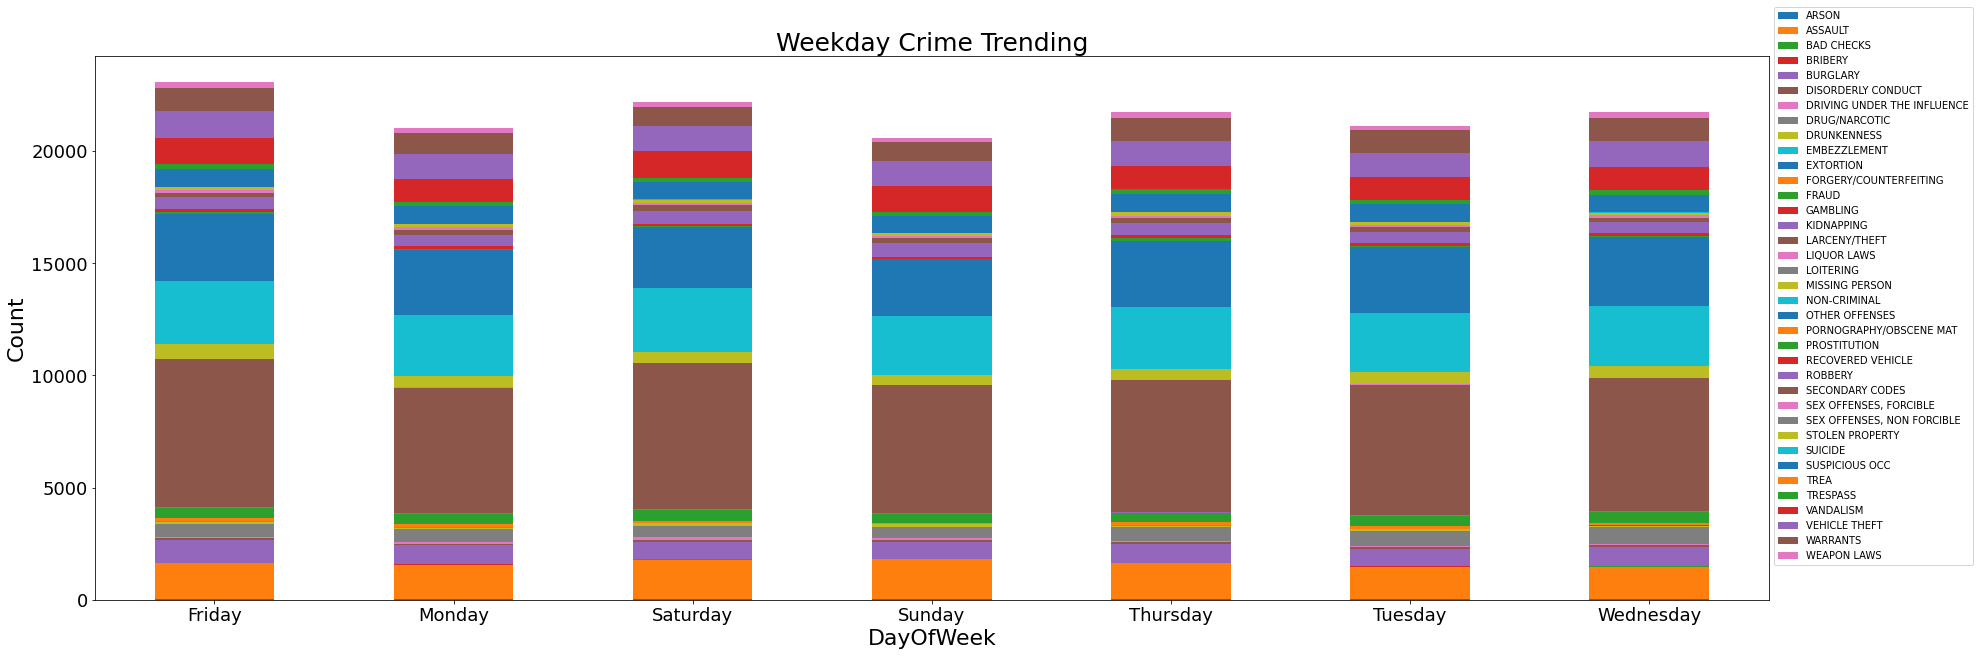

In [0]:
# Visualize Result
q8_pd_df = week_day_crime.toPandas()
q8_pd_df = q8_pd_df.pivot(index='DayOfWeek', columns='Category', values='Count')
q8_pd_df.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xlabel('DayOfWeek', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Weekday Crime Trending', fontsize=25)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.01, 0.1))

##### Q8_Insight:
1. There is not much difference in crime counts between different weekdays in 2015. However, Friday's crime numbers   
   was slightly higher than other days.
2. The top 4 crime categories resolved (>90%) are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.

### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis.  
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

### Conclusion. 
##### The concern of living safely in San Francisco has drastically increased due to the climbing crime rates in the past years. 
##### We are determined to dive deeply into the historical Police Department Incident Reports to learn from the data, thus providing valuable insights for the government and police force. The dataset includes more than 2 million sample points(observations) spaning 16 years from the beginning of 2003 through the end of 2018. 
##### Our study can be generally classified into 4 parts:

1) Overview: crime categories (Q1), crime distributions in different districts (Q2) and their ranking (Q6)
2) SF downtown crimes (Q3)
3) Crime variation with time, i.e. annually (Q4), hourly (Q5), weekly (Q8)
4) Crime resolution rates (Q7) in terms of different crime categories

##### In order to conduct the Online Analysis Processing (OLAP) on such a big dataset, I used Spark, Spark SQL to process the data and create related Spark SQL DataFrame, before further analysis and calculation were conducted. Then most of the visualization was realized through seaborn or matplotlib.

##### The results showed that there are 37 different crime categories in SF, which can be roughly classified into 4 categories, i.e. Extremely high crime rate, High crime rate, Medium crime rate and Low crime rate. The safety varied among different districts. Southern district is the most dangerous place, while Richmond is the safest. Crime rates also varied from 2015 to 2018. The regulation, Acts, government and police's action greatly influenced the crime situation.  Police should increase police patrol during the crime peak time and pay extra attention to LACENY/THEFT, which is the most frequent crimes in SF. Meanwhile, those crimes are also the most difficult to resolve. This kind to crimes significantly reduced people's satisfaction of living in SF. The federal government and the police should work together to approve Acts or regulations as well as taking action on the street to improve the current situation.

### Optional part: Clustering
You can apply Spark ML custering algorithm to cluster the spatial data, then visualize the clustering results. Do not do this until you understand Spark ML, we would like to cover this in the DS track.

### Optional part: Time series analysis
This part is not based on Spark, and only based on Pandas Time Series package.   
Note: I am not familiar with time series model, please refer the ARIMA model introduced by other teacher.   
process:  
1.visualize time series  
2.plot ACF and find optimal parameter  
3.Train ARIMA  
4.Prediction 

Refer:   
https://zhuanlan.zhihu.com/p/35282988  
https://zhuanlan.zhihu.com/p/35128342  
https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html  
https://www.howtoing.com/a-guide-to-time-series-forecasting-with-arima-in-python-3  
https://www.joinquant.com/post/9576?tag=algorithm  
https://blog.csdn.net/u012052268/article/details/79452244